#Задание 5. Интерпретация моделей машинного обучения

## Получение объяснений от моделей машинного обучения

**Цель работы** – получить навыки получения и интерпретации моделей машинного обучения.

**Задачи** – получить объяснения на основе графиков частичной зависимости, важности перестановок и значений Шепли для разных моделей машинного обучения, согласно Вашему варианту задачи.


https://colab.research.google.com/drive/1j6kHnNTAOmSXbfKHBooul1a6Df2n_8GS?usp=sharing

# Импорт библиотек

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install shap

# Бинарный Классификатор

### Подготовка данных

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetes_012_health_indicators_BRFSS2015.csv')

In [ ]:
df = df[:4000]

In [ ]:
df.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [ ]:
df.describe()

Diabetes_012       HighBP     HighChol    CholCheck          BMI  \
count   4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean       0.410250     0.526750     0.478000     0.973000    29.238500   
std        0.795992     0.499346     0.499578     0.162104     6.518032   
min        0.000000     0.000000     0.000000     0.000000    14.000000   
25%        0.000000     0.000000     0.000000     1.000000    25.000000   
50%        0.000000     1.000000     0.000000     1.000000    28.000000   
75%        0.000000     1.000000     1.000000     1.000000    32.000000   
max        2.000000     1.000000     1.000000     1.000000    63.000000   

            Smoker       Stroke  HeartDiseaseorAttack  PhysActivity  \
count  4000.000000  4000.000000           4000.000000   4000.000000   
mean      0.446750     0.057250              0.109250      0.690750   
std       0.497219     0.232349              0.311992      0.462242   
min       0.000000     0.000000              0.000000      0.000000   
25%       0.000000     0.000000              0.000000      0.000000   
50%       0.000000     0.000000              0.000000      1.000000   
75%       1.000000     0.000000              0.000000      1.000000   
max       1.000000     1.000000              1.000000      1.000000   

            Fruits  ...  AnyHealthcare  NoDocbcCost      GenHlth     MentHlth  \
count  4000.000000  ...    4000.000000  4000.000000  4000.000000  4000.000000   
mean      0.549000  ...       0.939500     0.123750     2.758000     4.070250   
std       0.497655  ...       0.238441     0.329337     1.131926     8.424759   
min       0.000000  ...       0.000000     0.000000     1.000000     0.000000   
25%       0.000000  ...       1.000000     0.000000     2.000000     0.000000   
50%       1.000000  ...       1.000000     0.000000     3.000000     0.000000   
75%       1.000000  ...       1.000000     0.000000     3.000000     3.000000   
max       1.000000  ...       1.000000     1.000000     5.000000    30.000000   

          PhysHlth    DiffWalk          Sex          Age    Education  \
count  4000.000000  4000.00000  4000.000000  4000.000000  4000.000000   
mean      5.298500     0.24625     0.401500     7.965750     4.842250   
std       9.722656     0.43088     0.490263     2.976792     1.037851   
min       0.000000     0.00000     0.000000     1.000000     1.000000   
25%       0.000000     0.00000     0.000000     6.000000     4.000000   
50%       0.000000     0.00000     0.000000     8.000000     5.000000   
75%       5.000000     0.00000     1.000000    10.000000     6.000000   
max      30.000000     1.00000     1.000000    13.000000     6.000000   

           Income  
count  4000.00000  
mean      5.55625  
std       2.20999  
min       1.00000  
25%       4.00000  
50%       6.00000  
75%       8.00000  
max       8.00000  

[8 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          4000 non-null   float64
 1   HighBP                4000 non-null   float64
 2   HighChol              4000 non-null   float64
 3   CholCheck             4000 non-null   float64
 4   BMI                   4000 non-null   float64
 5   Smoker                4000 non-null   float64
 6   Stroke                4000 non-null   float64
 7   HeartDiseaseorAttack  4000 non-null   float64
 8   PhysActivity          4000 non-null   float64
 9   Fruits                4000 non-null   float64
 10  Veggies               4000 non-null   float64
 11  HvyAlcoholConsump     4000 non-null   float64
 12  AnyHealthcare         4000 non-null   float64
 13  NoDocbcCost           4000 non-null   float64
 14  GenHlth               4000 non-null   float64
 15  MentHlth             

##Описание наборов данных

In [ ]:
df['Classname'] = df['Diabetes_012'].apply(lambda x: 0 if x == 0 else 1)

- df['Classname'] =: Эта часть присваивает результат правой стороны уравнения новому столбцу с именем Classname в DataFrame df.

- df['Diabetes_012']: Это выбирает существующий столбец с именем Diabetes_012 из DataFrame.

- .apply(...): Метод .apply() - это мощный инструмент в Pandas. Он применяет функцию к каждому значению в выбранном столбце (Diabetes_012 в данном случае).

- lambda x: 0 if x == 0 else 1: Это lambda-функция, которая является способом определить небольшую анонимную функцию в одной строке.

  - x представляет каждое отдельное значение в столбце Diabetes_012, когда метод .apply() перебирает их.
  - Логика функции:
    - if x == 0: Если текущее значение (x) равно 0, функция возвращает 0.
    - else 1: В противном случае (если x не равно 0), функция возвращает 1.

In [ ]:
df['Classname'].unique()

array([0, 1])

In [ ]:
df.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  \
0                   0.0           0.0     0.0  ...          0.0      5.0   
1                   0.0           1.0     0.0  ...          1.0      3.0   
2                   0.0           0.0     1.0  ...          1.0      5.0   
3                   0.0           1.0     1.0  ...          0.0      2.0   
4                   0.0           1.0     1.0  ...          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  Classname  
0      18.0      15.0       1.0  0.0   9.0        4.0     3.0          0  
1       0.0       0.0       0.0  0.0   7.0        6.0     1.0          0  
2      30.0      30.0       1.0  0.0   9.0        4.0     8.0          0  
3       0.0       0.0       0.0  0.0  11.0        3.0     6.0          0  
4       3.0       0.0       0.0  0.0  11.0        5.0     4.0          0  

[5 rows x 23 columns]

In [ ]:
X = df.drop(['Diabetes_012', 'Classname'],axis=1)
y = df['Classname']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

- from sklearn.model_selection import train_test_split:
  - Эта строка импортирует функцию train_test_split из модуля sklearn.model_selection. Эта функция является важным инструментом в машинном обучении для разделения данных на обучающие и тестовые наборы.

- X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1):

  - В этой строке происходит фактическое разделение. Давайте разберем ее подробнее:
    - X: Эта переменная, вероятно, содержит признаки или независимые переменные (данные, используемые для прогнозирования).
    - y: Эта переменная, вероятно, содержит целевую переменную или зависимую переменную (то, что вы пытаетесь предсказать).
    - test_size=0.3: Это указывает, что 30% данных должно быть выделено для тестового набора, а остальные 70% будут использованы для обучения.
    - random_state=1: Это гарантирует, что данные будут разделены одинаково каждый раз при запуске кода. Это важно для воспроизводимости. Если не установите random_state, будете получать разные разделения каждый раз.
    - X_train, X_test, y_train, y_test: Это четыре переменные, которые будут хранить результирующие разделения данных:
      - X_train: Признаки, используемые для обучения модели машинного обучения.
      - X_test: Признаки, используемые для проверки производительности модели на невидимых данных.
      - y_train: Целевая переменная, соответствующая обучающим данным.
      - y_test: Целевая переменная, соответствующая тестовым данным.

# Gradient Boosting - Binary classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

##Параметры архитектур и обучения классических моделей и нейронных сетей, использованные для обучения

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators = 15, max_depth=3)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=15)

- Строка 1: gb_model = GradientBoostingClassifier(n_estimators = 15, max_depth=3)

  - GradientBoostingClassifier: Это тип модели машинного обучения, используемый для задач классификации (предсказание категорий или классов). Она работает, строя последовательность деревьев решений, где каждое дерево учится на ошибках предыдущих, в конечном итоге улучшая общую точность предсказания.
  - gb_model: Это переменная, которая будет хранить нашу модель градиентного бустинга. Представьте ее как контейнер, содержащий всю информацию о модели.
  - n_estimators = 15: Этот параметр управляет количеством деревьев решений, построенных в модели. В этом случае мы используем 15 деревьев. Большее количество деревьев иногда может привести к лучшей производительности, но также увеличивает время вычислений.
  - max_depth = 3: Этот параметр ограничивает глубину каждого дерева решений. Глубина дерева представляет собой количество решений, которые оно может принять, прежде чем достигнуть предсказания. Ограничение глубины помогает предотвратить переобучение модели на обучающих данных (запоминание их слишком хорошо и не обобщение на новые данные).

- Строка 2: gb_model.fit(X_train, y_train)
  - fit: Это метод, который используется для обучения модели градиентного бустинга.
  - X_train: Это обучающие данные, содержащие признаки (входные переменные), используемые для прогнозирования.
  - y_train: Это соответствующая целевая переменная или метки для обучающих данных. Она сообщает модели, что она должна предсказывать для каждого экземпляра в X_train.

In [ ]:
gb_y_pred_tree = gb_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=gb_y_pred_tree))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       940
           1       0.61      0.07      0.12       260

    accuracy                           0.79      1200
   macro avg       0.70      0.53      0.50      1200
weighted avg       0.75      0.79      0.71      1200



##Оценки моделей на тестовых выборках в виде таблиц/ диаграмм, отображающих метрики качества

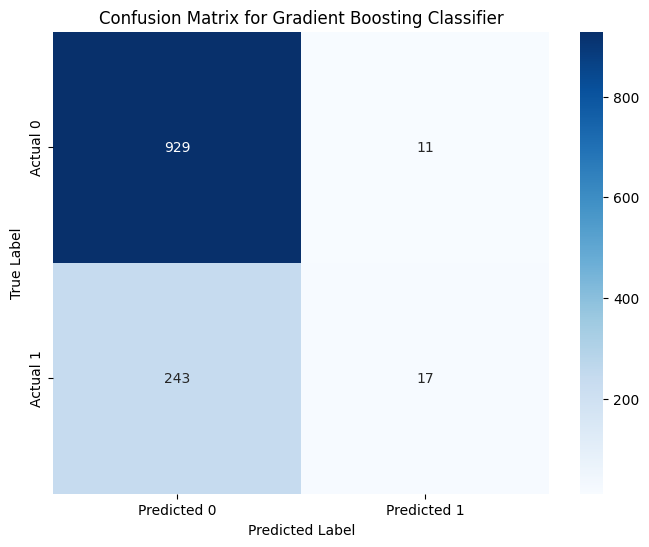

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and gb_y_pred_tree are defined from your previous code

cm = confusion_matrix(y_test, gb_y_pred_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- cm = ...: Эта строка присваивает результат функции confusion_matrix переменной cm.
- confusion_matrix(y_test, gb_y_pred_tree): Этот вызов функции вычисляет матрицу ошибок.
  - y_test: Эта переменная содержит истинные метки тестовых данных (фактические классификации).
  - gb_y_pred_tree: Эта переменная содержит предсказанные метки, сгенерированные моделью градиентного бустинга на тестовых данных.


- plt.figure(figsize=(8, 6)): Это создает новый рисунок для графика с определенным размером (8 дюймов в ширину, 6 дюймов в высоту).
- sns.heatmap(cm, ...): Это ядро визуализации, использующее функцию heatmap из seaborn для создания визуального представления матрицы ошибок.
  - cm: Данные матрицы ошибок.
  - annot=True: Это отображает числовые значения в каждой ячейке тепловой карты.
  - fmt="d": Это гарантирует, что аннотации отображаются как целые числа.
  - cmap="Blues": Это устанавливает цветовую схему в оттенках синего.
  - xticklabels, yticklabels: Эти параметры устанавливают метки для осей x и y (предсказанные и фактические метки соответственно).

In [ ]:
import shap
gb_explainer = shap.TreeExplainer(gb_model)
gb_shap_values = gb_explainer.shap_values(X_test)

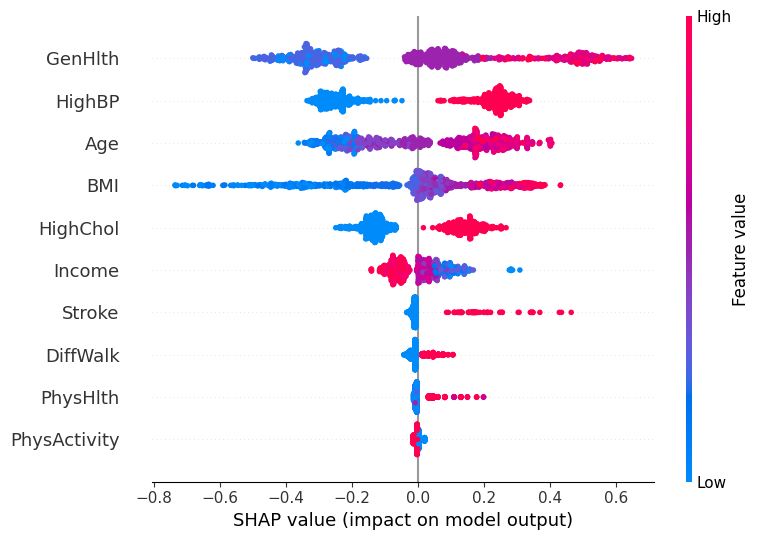

In [ ]:
# shap.summary_plot(gb_shap_values[:,:,0], X_test, max_display = 10)
shap.summary_plot(gb_shap_values, X_test, max_display = 10, show = False)

- shap.summary_plot(): Это функция из библиотеки shap, которая генерирует сводный график.

- gb_shap_values: Эта переменная содержит значения SHAP, рассчитанные для тестовых данных (X_test). Значения SHAP представляют собой вклад каждого признака в предсказание модели для каждой отдельной точки данных. Они были рассчитаны ранее в коде с помощью gb_explainer.shap_values(X_test).

- X_test: Это тестовый набор данных, используемый для оценки модели. Он нужен здесь, чтобы график мог понять значения признаков, которые соответствуют значениям SHAP.

- max_display = 10: Этот аргумент ограничивает график отображением 10 наиболее важных признаков.

- show = False: Этот аргумент, вероятно, предотвращает немедленное отображение графика в выходных данных Jupyter Notebook. Пользователь может сохранять график в файл или дополнительно манипулировать им перед отображением.

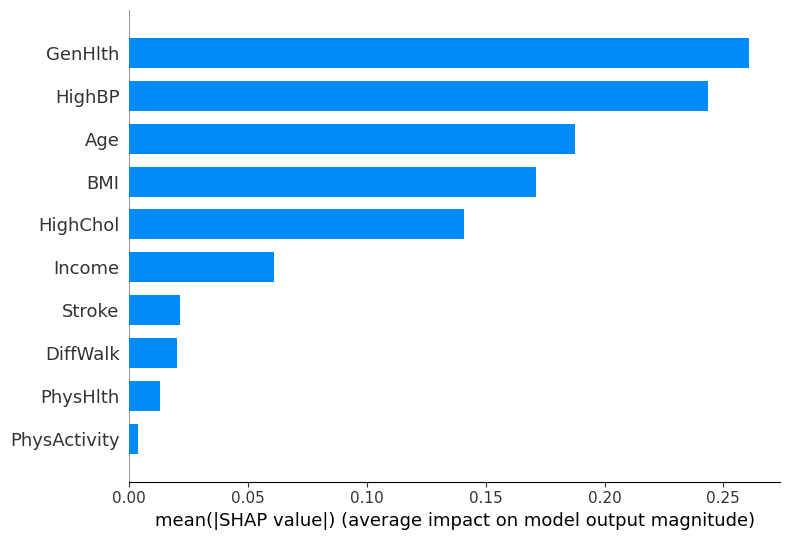

In [ ]:
shap.summary_plot(gb_shap_values, X_test, plot_type = 'bar', max_display = 10) #

- shap.summary_plot(): Это функция из библиотеки shap, которая генерирует график.
- gb_shap_values: Эта переменная, вероятно, содержит значения SHAP, которые были ранее рассчитаны для модели. Значения SHAP количественно определяют влияние каждого признака на отдельные предсказания. В этом случае, вероятно, они были вычислены с использованием древовидной модели (например, градиентного бустинга или случайного леса) из-за наличия gb_explainer в предыдущем коде.
- X_test: Это тестовый набор данных. Он используется для предоставления контекста значениям SHAP, связывая их с фактическими значениями признаков.
- plot_type = 'bar': Этот аргумент указывает тип создаваемого графика, который в данном случае является столбчатой диаграммой. Столбчатые диаграммы — это распространенный способ визуализации важности признаков, где высота столбца представляет собой влияние каждого признака.
- max_display = 10: Это ограничивает график отображением только 10 наиболее важных признаков, что делает график более легким для чтения и интерпретации. Если у вас большое количество признаков, использование max_display поможет упростить его.

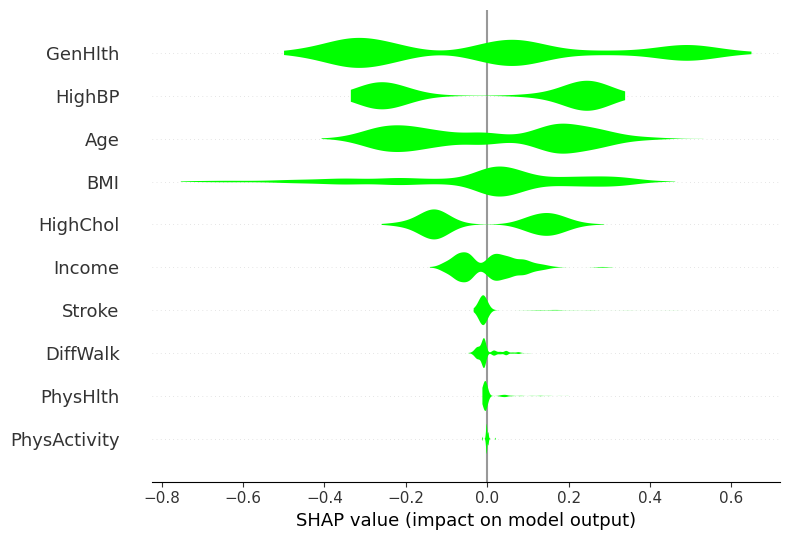

In [ ]:
shap.summary_plot(gb_explainer.shap_values(X), feature_names = X.columns.tolist(), plot_type = 'violin', color = 'Lime', max_display=10)

In [ ]:
gb_f = lambda x: gb_model.predict_proba(x)[:,1]
gb_median = X_train.median().values.reshape((1,X_train.shape[1]))

gb_explainer = shap.Explainer(gb_f, gb_median)
gb_shap_values = gb_explainer(X_test)#.iloc[0:10,:])

PermutationExplainer explainer: 1201it [00:46, 24.75it/s]


- gb_f: этой переменной присваивается функция с помощью лямбда-выражения. Эта функция, по сути, принимает набор данных (x) и возвращает предсказанную вероятность положительного класса (класс 1) из модели gb_model.
- gb_model.predict_proba(x): эта часть использует обученную модель Градиентного Бустинга (gb_model) для предсказания вероятностей для обоих классов (0 и 1) для заданных входных данных (x).
- [:,1]: это выбирает только вероятности для положительного класса (класс 1).

- gb_median: эта переменная хранит медианные значения каждого признака в обучающих данных (X_train).
- X_train.median(): это вычисляет медиану для каждого столбца (признака) в обучающих данных.
- .values.reshape((1,X_train.shape[1])): это преобразует медианы в массив NumPy и изменяет его форму так, чтобы он имел одну строку и такое же количество столбцов, как и признаки. Это изменение формы часто необходимо для совместимости с SHAP.


- gb_explainer: это создает объект-интерпретатор SHAP. Этот объект будет использоваться для расчета значений SHAP.
- shap.Explainer(): это функция из библиотеки shap, которая создает интерпретатор.
- gb_f: это функция предсказания, которую мы определили ранее (с помощью lambda), которую будет использовать интерпретатор.
- gb_median: это предоставляется в качестве фоновых данных для интерпретатора. Фоновые данные помогают установить базовый уровень для сравнения при расчете значений SHAP. Использование медианы обучающих данных является распространенной практикой.

- gb_shap_values: эта переменная будет хранить рассчитанные значения SHAP.
- gb_explainer(X_test): это вызывает объект-интерпретатор SHAP (gb_explainer) для расчета значений SHAP для тестовых данных (X_test). Эти значения покажут вклад каждого признака в предсказание модели для каждого экземпляра в тестовом наборе.

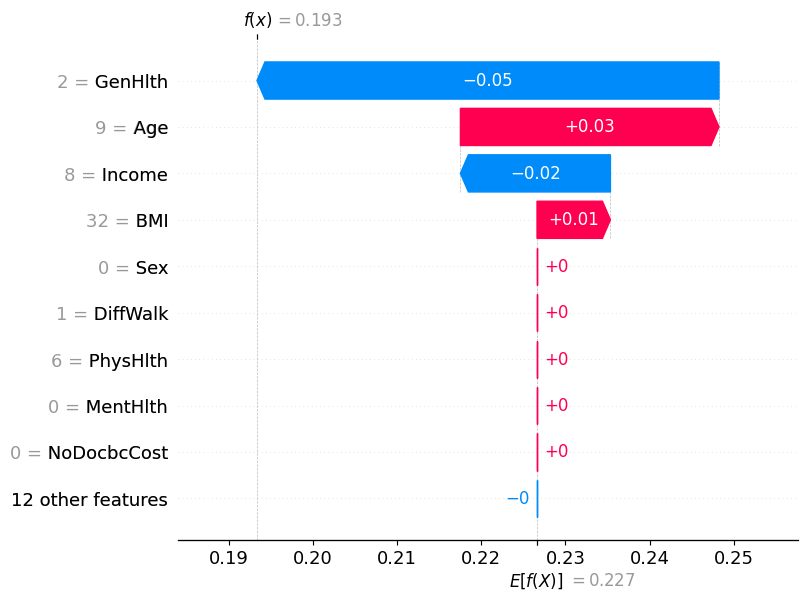

In [ ]:
shap.plots.waterfall(gb_shap_values[2])

- shap.plots.waterfall: Это функция из библиотеки shap, используемая для создания каскадных графиков. Каскадные графики — это способ визуализировать вклад каждого признака в единичное предсказание, сделанное моделью.

- gb_shap_values: Эта переменная, вероятно, хранит значения SHAP, рассчитанные для модели градиентного бустинга (gb_model). Значения SHAP количественно определяют влияние каждого признака на предсказание модели.

- [2]: Это индексация переменной gb_shap_values. Она выбирает значения SHAP для третьего наблюдения (Python использует нулевую индексацию) в наборе данных

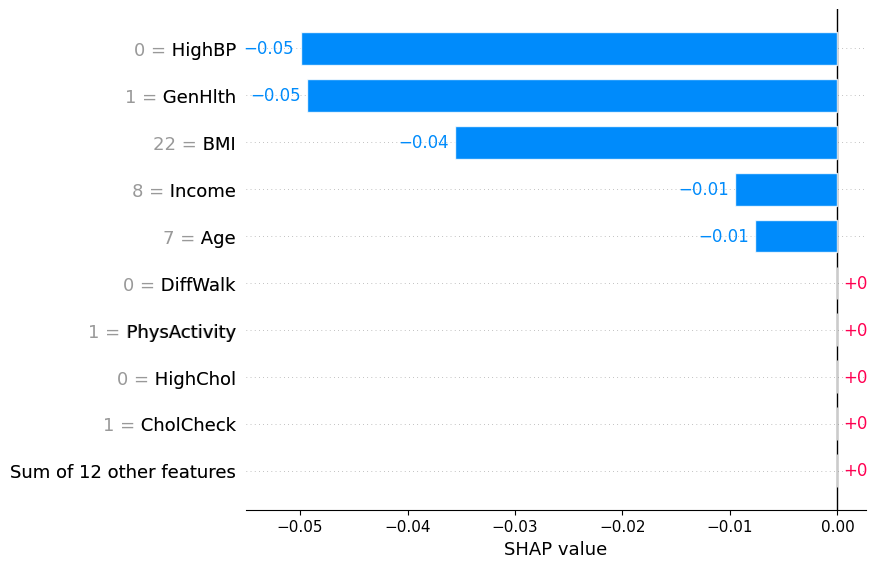

In [ ]:
shap.plots.bar(gb_shap_values[1])

In [ ]:
shap.plots.initjs()
shap.plots.force(gb_shap_values[5],
                 feature_names = X.columns.tolist())

- shap.plots.initjs(): Эта строка инициализирует инструменты визуализации Javascript, необходимые для графиков SHAP в среде Jupyter Notebook. Это необходимо для правильного отображения интерактивных графиков.

- shap.plots.force(...): Эта строка создает силовой график (force plot). Силовой график визуализирует вклад каждого признака в предсказание для одного экземпляра данных.

- gb_shap_values[5]: Эта часть ссылается на значения SHAP, которые были ранее рассчитаны для модели. Она специально выбирает значения SHAP для 6-го экземпляра (индекс 5 из-за нулевой индексации) в наборе данных (X_test или во всем наборе данных X, в зависимости от того, как рассчитали gb_shap_values).

- feature_names = X.columns.tolist(): Эта часть предоставляет имена признаков силовому графику, гарантируя, что график будет помечен фактическими именами признаков, а не просто их индексами. X.columns.tolist() извлекает имена столбцов из DataFrame X и преобразует их в список.

In [ ]:
shap.plots.initjs()
shap.plots.force(gb_shap_values)


- Строка 1: shap.plots.initjs()
  - shap.plots.initjs(): Эта строка необходима для отображения графиков SHAP в среде Jupyter Notebook. Она инициализирует необходимые библиотеки Javascript, которые SHAP использует для своих интерактивных визуализаций. Без этой строки силовой график (который мы обсудим далее) может отображаться некорректно.

- Строка 2: shap.plots.force(gb_shap_values)
  - shap.plots.force(...): Эта строка является основной частью визуализации. Она генерирует силовой график SHAP (force plot). Силовой график обеспечивает визуальное объяснение предсказания модели для конкретного экземпляра или для нескольких экземпляров, показывая, как каждый признак способствует повышению или понижению предсказания.
  - gb_shap_values: Эта переменная, скорее всего, содержит значения SHAP, которые были ранее рассчитаны для модели градиентного бустинга (gb_model). Значения SHAP количественно определяют влияние каждого признака на предсказания модели. В данном случае, похоже, gb_shap_values содержит значения SHAP, возможно, для всех экземпляров в наборе данных, что приводит к созданию силового графика, визуализирующего глобальную важность признаков и взаимодействия между всеми экземплярами, а не для одного предсказания.



In [ ]:
  gb_feature_importances = pd.DataFrame({'feature': X.columns, 'importance': gb_model.feature_importances_})
  gb_feature_importances = gb_feature_importances.sort_values('importance', ascending=False)

- gb_feature_importances: Это переменная, которая будет хранить Pandas DataFrame. DataFrame - это как таблица, которая организует данные в строки и столбцы.
  - pd.DataFrame(...): Эта часть создает DataFrame.
    - {'feature': X.columns, 'importance': gb_model.feature_importances_}: Это словарь, который определяет столбцы DataFrame:
    - 'feature': Этот столбец будет содержать имена признаков (входные переменные, используемые в модели). X.columns извлекает имена признаков из набора данных X.
    - 'importance': Этот столбец будет содержать оценки важности для каждого признака, рассчитанные моделью градиентного бустинга (gb_model). gb_model.feature_importances_ - это атрибут обученной модели, который хранит эти оценки.


- sort_values(...): Это метод, применяемый к DataFrame (gb_feature_importances) для его сортировки.
  - 'importance': Это указывает, что сортировка должна быть основана на столбце 'importance'.
  - ascending=False: Это означает, что DataFrame будет отсортирован в порядке убывания важности. Наиболее важные признаки будут наверху.



In [ ]:
 gb_feature_importances

feature  importance
13               GenHlth    0.319373
3                    BMI    0.201066
0                 HighBP    0.193796
18                   Age    0.122619
1               HighChol    0.078185
20                Income    0.030397
5                 Stroke    0.025161
16              DiffWalk    0.017540
15              PhysHlth    0.007366
19             Education    0.003037
7           PhysActivity    0.001459
6   HeartDiseaseorAttack    0.000000
8                 Fruits    0.000000
9                Veggies    0.000000
11         AnyHealthcare    0.000000
12           NoDocbcCost    0.000000
4                 Smoker    0.000000
14              MentHlth    0.000000
17                   Sex    0.000000
2              CholCheck    0.000000
10     HvyAlcoholConsump    0.000000

In [ ]:
print("\nSHAP values for Gradient Boosting (first 5 observations):\n", gb_shap_values[0:5])


SHAP values for Gradient Boosting (first 5 observations):
 .values =
array([[-0.06230649,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.06118477,  0.        ,
         0.        ,  0.        ,  0.        , -0.02023335,  0.        ,
        -0.00832338],
       [-0.04995161,  0.        ,  0.        , -0.03556581,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.04935839,  0.        ,
         0.        ,  0.        ,  0.        , -0.00765031,  0.        ,
        -0.00952186],
       [ 0.        ,  0.        ,  0.        ,  0.00871842,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.05487687,  0.        ,
         0.        ,  0.        ,  0.        ,  0.03071207,  0.        ,
        -0

# Random Forest - Binary classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 15, max_depth=3)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=15)

- rf_model = RandomForestClassifier(n_estimators = 15, max_depth=3):
  - rf_model = ...: Эта строка создает переменную с именем rf_model и присваивает ей машину Случайного Леса, которую мы только что импортировали. Представьте, что мы даем машине имя, чтобы потом легко к ней обращаться.
  - RandomForestClassifier(...): Здесь мы фактически создаем экземпляр машины. Мы также можем задать ей некоторые настройки (называемые параметрами), чтобы настроить ее работу:
    - n_estimators = 15: Эта настройка говорит машине создать 15 деревьев решений внутри леса. Большее количество деревьев иногда может улучшить точность, но займет больше времени на построение.
    - max_depth = 3: Эта настройка ограничивает глубину каждого дерева решений (сколько уровней решений оно может принять). Это помогает предотвратить чрезмерную сложность модели и потенциальное переобучение на обучающих данных.

- rf_model.fit(X_train, y_train):
  - rf_model.fit(...): Эта строка запускает процесс обучения нашей модели Случайного Леса. Представьте, что мы даем машине инструкции и примеры, необходимые для обучения.
  - X_train: Это обучающие данные, содержащие признаки или входные переменные, используемые для прогнозирования. Это как дать машине набор примеров для обучения.
  - y_train: Это соответствующая целевая переменная или метки для обучающих данных. Она сообщает машине, что она должна предсказывать для каждого примера в X_train.

In [ ]:
rf_y_pred_tree = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=rf_y_pred_tree))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88       940
           1       0.50      0.00      0.01       260

    accuracy                           0.78      1200
   macro avg       0.64      0.50      0.44      1200
weighted avg       0.72      0.78      0.69      1200



In [ ]:
import shap
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(X_test)

- rf_explainer = shap.TreeExplainer(rf_model): Здесь мы создаем объект TreeExplainer, используя библиотеку shap.
  - shap.TreeExplainer: Это особый тип объясняющего модуля (explainer) в shap, разработанный для работы с моделями, основанными на деревьях решений, такими как Случайный лес (rf_model в данном случае). Он оптимизирован для эффективного вычисления значений SHAP для этих моделей.
  - rf_model: Это обученная модель Случайного леса, которую хотите объяснить. TreeExplainer будет использовать структуру и параметры этой модели, чтобы понять, как она делает прогнозы.
  - rf_explainer: Эта переменная теперь содержит объект TreeExplainer, который будете использовать на следующем шаге для расчета значений SHAP.

- rf_shap_values = rf_explainer.shap_values(X_test): Здесь происходит фактическое вычисление значений SHAP.
  - rf_explainer.shap_values: Этот метод объекта TreeExplainer используется для вычисления значений SHAP.
  - X_test: Это набор данных, для которого хотите рассчитать значения SHAP. Обычно это тестовый набор данных, так как вам интересно понять, как модель ведет себя на невидимых данных.
  - rf_shap_values: Эта переменная будет хранить рассчитанные значения SHAP. Эти значения количественно определяют вклад каждого признака в прогнозы модели для каждого экземпляра в X_test.

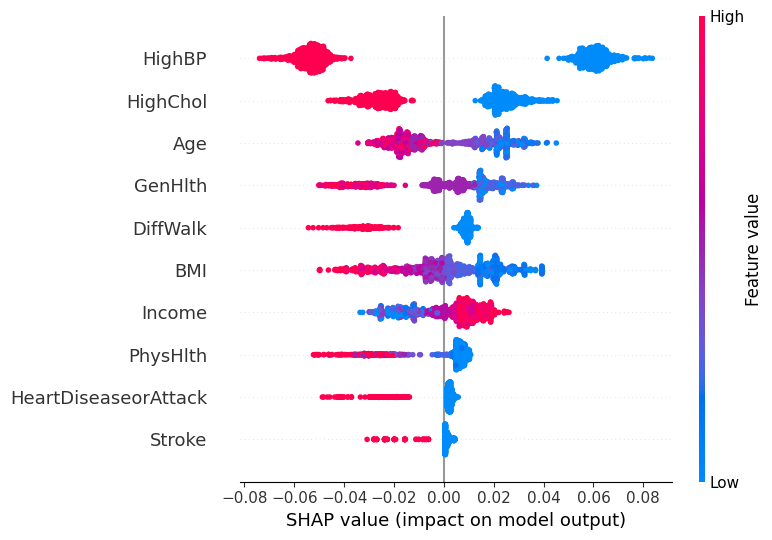

In [ ]:
shap.summary_plot(rf_shap_values[:,:,0], X_test, max_display = 10)

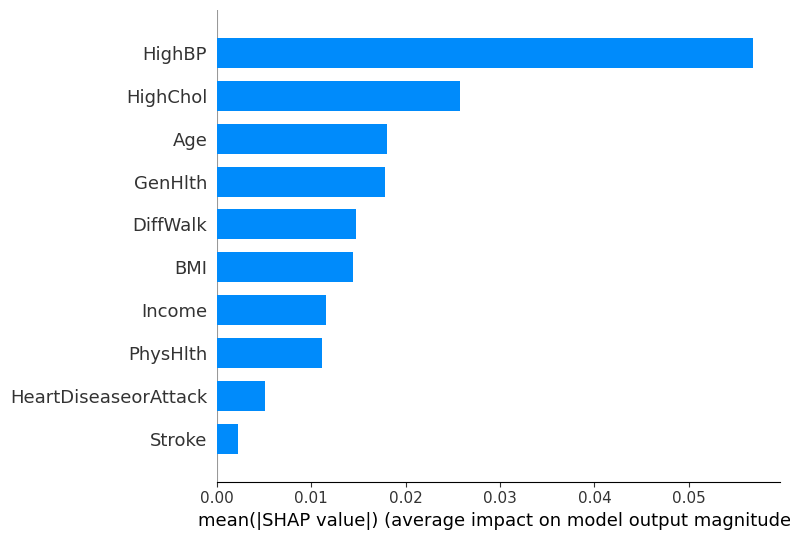

In [ ]:
shap.summary_plot(rf_shap_values[:,:,0], X_test, plot_type = 'bar', max_display = 10) #

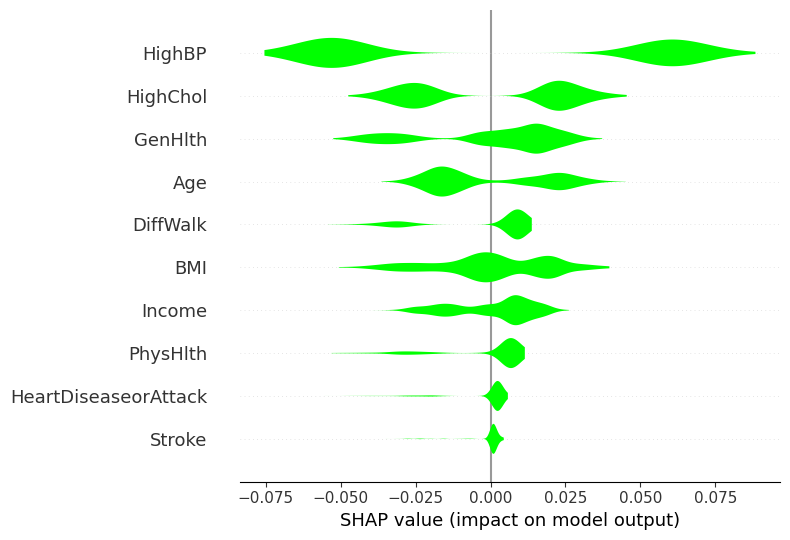

In [ ]:
shap.summary_plot(rf_explainer.shap_values(X)[:,:,0], feature_names = X.columns.tolist(), plot_type = 'violin', color = 'Lime', max_display=10)

In [ ]:
rf_f = lambda x: rf_model.predict_proba(x)[:,1]
rf_median = X_train.median().values.reshape((1,X_train.shape[1]))

rf_explainer = shap.Explainer(rf_f, rf_median)
rf_shap_values = rf_explainer(X_test)#.iloc[0:10,:])

PermutationExplainer explainer: 1201it [01:22, 12.89it/s]


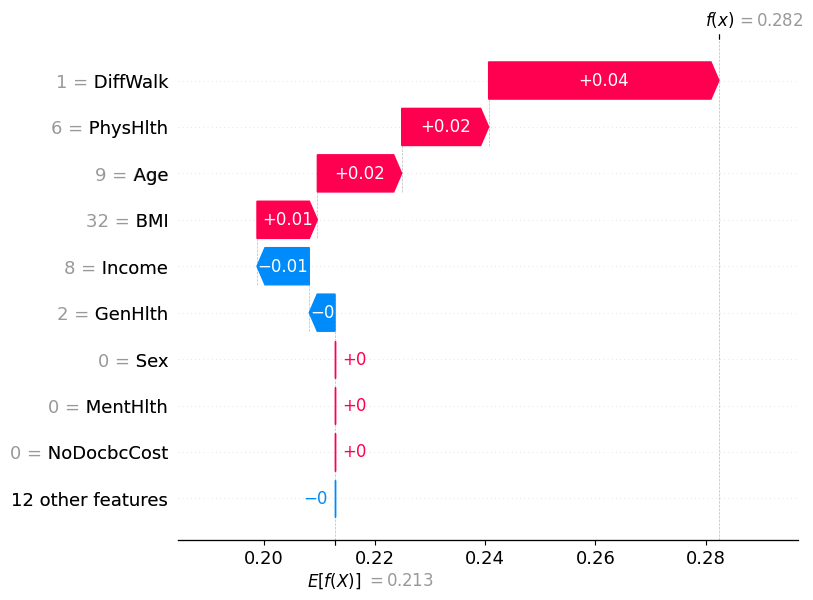

In [ ]:
shap.plots.waterfall(rf_shap_values[2])


In [ ]:
shap.plots.initjs()
shap.plots.force(rf_shap_values[5],
                 feature_names = X.columns.tolist())


In [ ]:
shap.plots.initjs()
shap.plots.force(rf_shap_values)


- shap.plots.initjs()
  - shap.plots.initjs(): Эта строка необходима для отображения графиков SHAP (в частности, интерактивных, таких как силовой график) в среде Jupyter Notebook. Она инициализирует необходимые библиотеки Javascript, которые SHAP использует для своих интерактивных визуализаций. Без этой строки силовой график может отображаться некорректно.

- shap.plots.force(rf_shap_values)
  - shap.plots.force(...): Эта строка является основной частью визуализации. Она генерирует силовой график SHAP (force plot). Силовой график обеспечивает визуальное объяснение предсказания модели, показывая, как каждый признак способствует повышению или понижению предсказания.
  - rf_shap_values: Эта переменная, скорее всего, содержит значения SHAP, которые были ранее рассчитаны для модели Случайного Леса (rf_model). Значения SHAP количественно определяют влияние каждого признака на предсказания модели. В данном случае, похоже, rf_shap_values содержит значения SHAP, возможно, для всех экземпляров в наборе данных, что приводит к созданию силового графика, визуализирующего глобальную важность признаков и взаимодействия между всеми экземплярами, а не для одного предсказания.

In [ ]:
rf_feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
rf_feature_importances = rf_feature_importances.sort_values('importance', ascending=False)

In [ ]:
rf_feature_importances

feature  importance
0                 HighBP    0.322977
1               HighChol    0.109517
3                    BMI    0.109170
13               GenHlth    0.108728
16              DiffWalk    0.087200
18                   Age    0.083567
20                Income    0.056413
15              PhysHlth    0.053789
6   HeartDiseaseorAttack    0.024741
5                 Stroke    0.018190
14              MentHlth    0.014813
19             Education    0.004556
10     HvyAlcoholConsump    0.003283
2              CholCheck    0.001997
17                   Sex    0.000752
8                 Fruits    0.000305
7           PhysActivity    0.000000
9                Veggies    0.000000
11         AnyHealthcare    0.000000
12           NoDocbcCost    0.000000
4                 Smoker    0.000000

In [ ]:
print("\nSHAP values for Random Forest (first 5 observations):\n", rf_shap_values[0:5])


SHAP values for Random Forest (first 5 observations):
 .values =
array([[-0.08570017,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.01155797,  0.        ,
         0.00123883,  0.        ,  0.        , -0.04129354,  0.        ,
        -0.0047376 ],
       [-0.09610586,  0.        ,  0.        , -0.01023996,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.01155797,  0.        ,
         0.        ,  0.        ,  0.        , -0.02394421,  0.        ,
        -0.0047376 ],
       [ 0.        ,  0.        ,  0.        ,  0.01094309,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.00467423,  0.        ,
         0.01575758,  0.04174244,  0.        ,  0.01528514,  0.        ,
        -0.009

# Logistic Regression - Binary Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
rl_X = X[['Age','GenHlth']]

In [ ]:
lr_model = LogisticRegression(C=0.1)
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [ ]:
lr_y_pred = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=lr_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       940
           1       0.49      0.21      0.29       260

    accuracy                           0.78      1200
   macro avg       0.65      0.57      0.58      1200
weighted avg       0.74      0.78      0.75      1200



<Axes: >

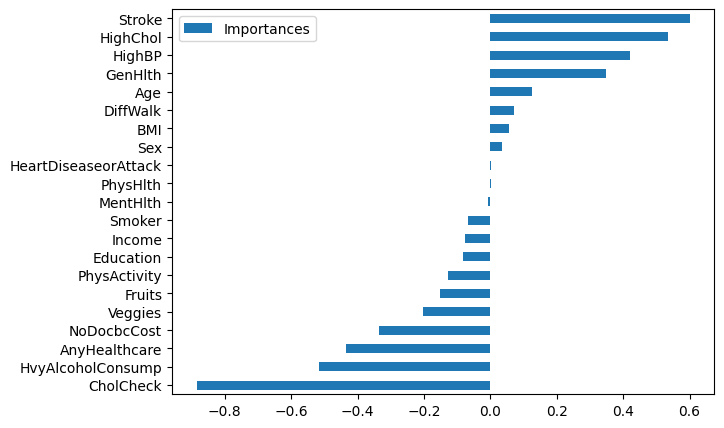

In [ ]:
coef_0 = lr_model.coef_[0]
feature_importances_log_reg_0_df = pd.DataFrame(coef_0,
                                           columns=['Importances'],
                                           index = X.columns).sort_values('Importances', ascending=True)
feature_importances_log_reg_0_df.plot.barh(figsize=(7,5))

- coef_0 = lr_model.coef_[0]:
  - lr_model.coef_: Это обращается к коэффициентам, которые были изучены моделью логистической регрессии. Коэффициенты представляют веса, назначенные каждому признаку в модели.
  - [0]: Логистическая регрессия может обрабатывать многоклассовую классификацию. [0] выбирает коэффициенты для первого класса (предполагая, что это задача бинарной классификации). Если бы это была многоклассовая задача, вам нужно было бы выбрать соответствующий массив коэффициентов, используя правильный номер индекса.
  - coef_0: Эта переменная теперь хранит коэффициенты для первого класса.

- feature_importances_log_reg_0_df = pd.DataFrame(...):
  - pd.DataFrame(...): Это создает Pandas DataFrame для хранения важности признаков в структурированном формате.
  - coef_0: Коэффициенты передаются в качестве данных в DataFrame.
  - columns=['Importances']: Это называет столбец в DataFrame 'Importances' (Важность).
  - index = X.columns: Это устанавливает метки строк (индекс) DataFrame на имена признаков из исходного набора данных (X).
  - sort_values('Importances', ascending=True): Это сортирует DataFrame на основе столбца 'Importances' в порядке возрастания (от наименее важного к наиболее важному).

- feature_importances_log_reg_0_df.plot.barh(figsize=(7,5)):
  - plot.barh(...): Это создает горизонтальную столбчатую диаграмму для визуализации важности признаков.
  - figsize=(7,5): Это устанавливает размер фигуры графика (7 дюймов в ширину и 5 дюймов в высоту).

In [ ]:
lr_explainer = shap.LinearExplainer(lr_model, X_train)
lr_shap_values = lr_explainer.shap_values(X_test)

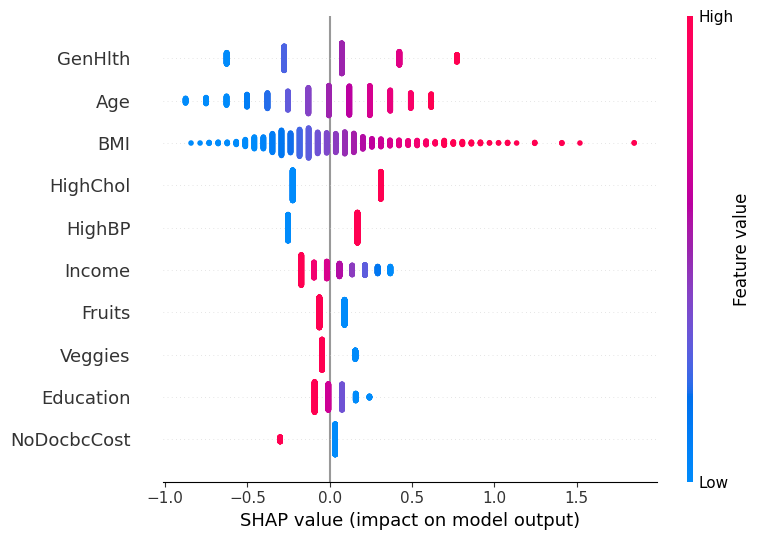

In [ ]:
shap.summary_plot(lr_shap_values, X_test, max_display = 10, show = False)

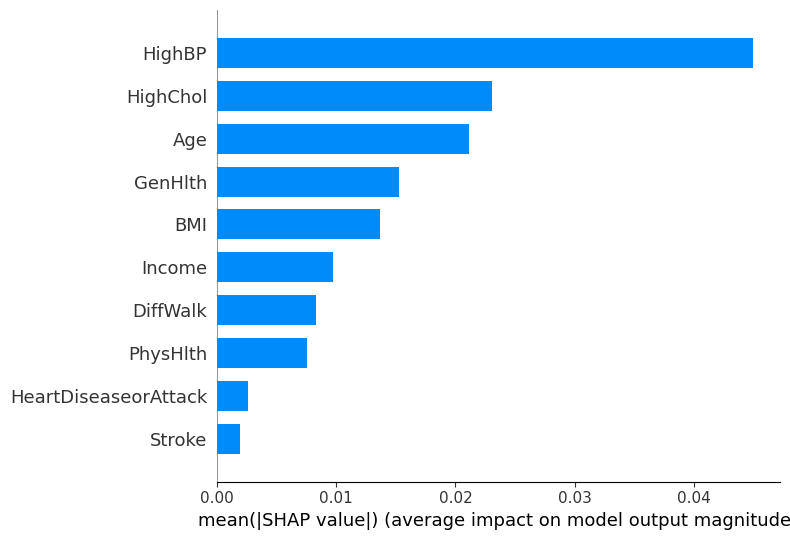

In [ ]:
shap.summary_plot(rf_shap_values, X_test, plot_type = 'bar', max_display = 10) #

# Regression Model

In [ ]:
r_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wine_quality_white_sample.csv',delimiter=';')

print(f"Размерность: {r_df.shape}")
print(f"Row: {r_df.shape[0]}")
print(f"Column: {r_df.shape[1]}")

Размерность: (4898, 12)
Row: 4898
Column: 12


In [ ]:
r_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [ ]:
r_df.head(20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.0              0.27         0.36           20.70      0.045   
1             6.3              0.30         0.34            1.60      0.049   
2             8.1              0.28         0.40            6.90      0.050   
3             7.2              0.23         0.32            8.50      0.058   
4             7.2              0.23         0.32            8.50      0.058   
5             8.1              0.28         0.40            6.90      0.050   
6             6.2              0.32         0.16            7.00      0.045   
7             7.0              0.27         0.36           20.70      0.045   
8             6.3              0.30         0.34            1.60      0.049   
9             8.1              0.22         0.43            1.50      0.044   
10            8.1              0.27         0.41            1.45      0.033   
11            8.6              0.23         0.40            4.20      0.035   
12            7.9              0.18         0.37            1.20      0.040   
13            6.6              0.16         0.40            1.50      0.044   
14            8.3              0.42         0.62           19.25      0.040   
15            6.6              0.17         0.38            1.50      0.032   
16            6.3              0.48         0.04            1.10      0.046   
17            6.2              0.66         0.48            1.20      0.029   
18            7.4              0.34         0.42            1.10      0.033   
19            6.5              0.31         0.14            7.50      0.044   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  45.0                 170.0   1.0010  3.00       0.45   
1                  14.0                 132.0   0.9940  3.30       0.49   
2                  30.0                  97.0   0.9951  3.26       0.44   
3                  47.0                 186.0   0.9956  3.19       0.40   
4                  47.0                 186.0   0.9956  3.19       0.40   
5                  30.0                  97.0   0.9951  3.26       0.44   
6                  30.0                 136.0   0.9949  3.18       0.47   
7                  45.0                 170.0   1.0010  3.00       0.45   
8                  14.0                 132.0   0.9940  3.30       0.49   
9                  28.0                 129.0   0.9938  3.22       0.45   
10                 11.0                  63.0   0.9908  2.99       0.56   
11                 17.0                 109.0   0.9947  3.14       0.53   
12                 16.0                  75.0   0.9920  3.18       0.63   
13                 48.0                 143.0   0.9912  3.54       0.52   
14                 41.0                 172.0   1.0002  2.98       0.67   
15                 28.0                 112.0   0.9914  3.25       0.55   
16                 30.0                  99.0   0.9928  3.24       0.36   
17                 29.0                  75.0   0.9892  3.33       0.39   
18                 17.0                 171.0   0.9917  3.12       0.53   
19                 34.0                 133.0   0.9955  3.22       0.50   

    alcohol  quality  
0       8.8        6  
1       9.5        6  
2      10.1        6  
3       9.9        6  
4       9.9        6  
5      10.1        6  
6       9.6        6  
7       8.8        6  
8       9.5        6  
9      11.0        6  
10     12.0        5  
11      9.7        5  
12     10.8        5  
13     12.4        7  
14      9.7        5  
15     11.4        7  
16      9.6        6  
17     12.8        8  
18     11.3        6  
19      9.5        5

In [ ]:
r_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

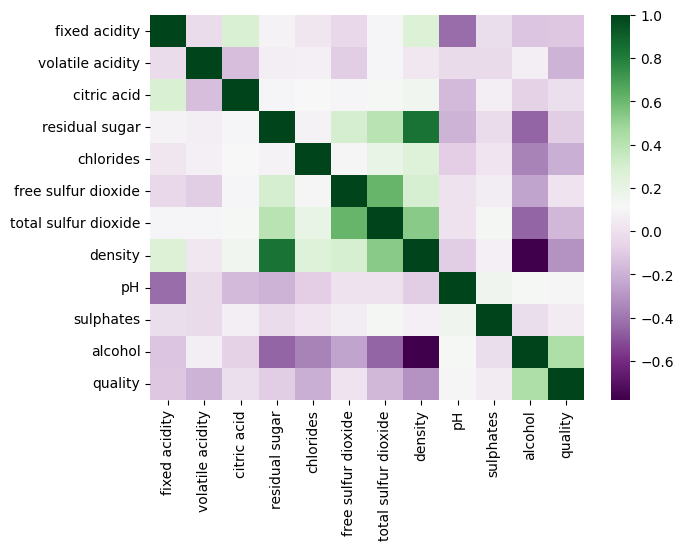

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(r_df.corr(),cmap='PRGn')
plt.show()

In [ ]:
r_X = r_df.drop(['quality'], axis=1)
r_y = r_df['quality']

In [ ]:
from sklearn.model_selection import train_test_split
r_X_train, r_X_test, r_y_train, r_y_test = train_test_split(r_X, r_y, test_size = 0.3, random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_test.shape}')

Train : (2800, 21), Test : (1200, 21)


- r_X_train, r_X_test, r_y_train, r_y_test = ...: Эта строка присваивает результаты функции train_test_split четырем переменным:
  - r_X_train: Будет содержать признаки (входные данные) для обучения модели.
  - r_X_test: Будет содержать признаки для тестирования модели.
  - r_y_train: Будет содержать целевую переменную (то, что вы пытаетесь предсказать) для обучения.
  - r_y_test: Будет содержать целевую переменную для тестирования.

- train_test_split(r_X, r_y, ...): Здесь происходит фактическое разделение.
  - r_X: Представляет признаки набора данных.
  - r_y: Представляет целевую переменную набора данных.
  - test_size = 0.3: Этот аргумент указывает, что 30% данных должно быть выделено для тестового набора, оставляя остальные 70% для обучения.
  - random_state = 0: Этот аргумент гарантирует, что данные будут разделены воспроизводимым образом. Если вы запустите этот код снова с тем же random_state, вы получите то же разделение каждый раз. Это важно для сравнения результатов разных запусков.



### Gradient Boosting - Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
gb_regressor = GradientBoostingRegressor(n_estimators=10,random_state=1)
gb_regressor.fit(r_X_train, r_y_train)

GradientBoostingRegressor(n_estimators=10, random_state=1)

- gb_regressor = GradientBoostingRegressor(n_estimators=10,random_state=1)
  - gb_regressor = ...: Эта строка создает переменную с именем gb_regressor. Представьте, что мы даем имя нашей модели градиентного бустинга. Мы будем использовать это имя позже, чтобы ссылаться на модель.
  - GradientBoostingRegressor(...): Это основа строки. Она вызывает функцию GradientBoostingRegressor из модуля sklearn.ensemble, чтобы создать объект модели градиентного бустинга.
  - n_estimators=10: Это параметр, передаваемый функции GradientBoostingRegressor. Он указывает, что модель будет использовать 10 деревьев решений (также называемых «слабыми учениками» или «базовыми оценщиками»). В градиентном бустинге несколько деревьев строятся последовательно, и каждое дерево пытается исправить ошибки предыдущих.
  - random_state=1: Этот параметр обеспечивает воспроизводимость результатов. Устанавливая определенное случайное состояние, мы гарантируем, что если мы запустим код снова, мы получим те же результаты. Это полезно для отладки и сравнения результатов разных запусков.

- gb_regressor.fit(r_X_train, r_y_train)
  - gb_regressor.fit(...): Эта строка - место, где происходит фактическое обучение. Она вызывает метод fit объекта gb_regressor (нашей модели градиентного бустинга), чтобы обучить его на наших данных.
  - r_X_train: Это обучающие данные, содержащие признаки (входные переменные), используемые для прогнозирования.
  - r_y_train: Это целевая переменная, представляющая значения, которые мы хотим, чтобы модель предсказывала. Модель изучает связи между признаками в r_X_train и соответствующими значениями в r_y_train.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
gb_r_y_pred = gb_regressor.predict(r_X_test)
print(f'R2 = {r2_score(r_y_test, gb_r_y_pred):.2f}')
print(f'MSE = {mean_squared_error(r_y_test, gb_r_y_pred):.2f}')

R2 = 0.22
MSE = 0.63


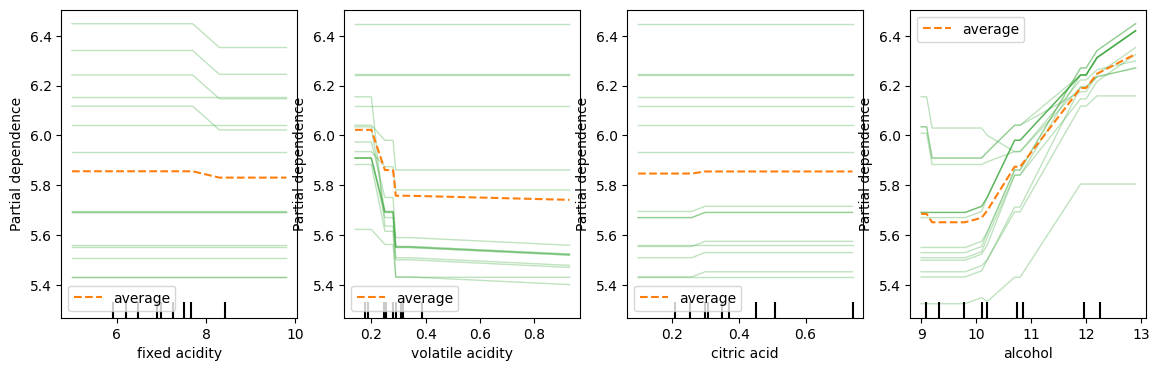

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol']
fig, ax = plt.subplots(ncols=4, figsize=(14,4))
display = PartialDependenceDisplay.from_estimator(gb_regressor, r_X_test.iloc[:15,:],
                                                  features, kind = 'both', random_state=0,
                                                  ice_lines_kw = {'color':'tab:green', 'linewidth':1},
                                                  pd_line_kw = {'color':'tab:orange', 'linestyle':'--'}, ax = ax)

- features = [...]: Эта строка создает список под названием features, содержащий имена признаков, которые мы хотим проанализировать. В этом случае фокус делается на «фиксированной кислотности», «летучей кислотности», «лимонной кислоте» и «алкоголе». Эти признаки, вероятно, являются столбцами в наборе данных (r_X_test).

- fig, ax = plt.subplots(...): Эта строка создает фигуру (fig) и массив осей (ax) для графика с помощью библиотеки matplotlib.pyplot (импортированной как plt).
  - ncols=4: Этот аргумент указывает, что мы хотим 4 подграфика, расположенных горизонтально (в столбцах). Это связано с тем, что мы анализируем 4 признака.
  - figsize=(14,4): Это устанавливает размер фигуры на 14 дюймов в ширину и 4 дюйма в высоту, обеспечивая достаточно места для подграфиков.


- display = PartialDependenceDisplay.from_estimator(...): Это ядро кода. Он создает объект PartialDependenceDisplay с именем display с помощью метода from_estimator. Давайте разберем аргументы:
  - gb_regressor: Это обученная модель градиентного бустинга регрессора, которую мы хотим проанализировать.
  - r_X_test.iloc[:15,:]: Это выбирает первые 15 строк из тестового набора данных (r_X_test). Он будет использовать это подмножество данных для расчета частичной зависимости.
  - features: Список признаков, который мы определили ранее, указывающий, какие признаки визуализировать.
  - kind = 'both': Этот аргумент указывает, что мы хотим построить как среднюю частичную зависимость (PDP), так и кривые индивидуального условного ожидания (ICE). PDP показывает средний эффект признака на прогноз, в то время как ICE показывает эффект для отдельных точек данных.
  - random_state=0: Это гарантирует воспроизводимость результатов.
  - ice_lines_kw = {...}: Этот словарь управляет внешним видом линий ICE, устанавливая цвет на зеленый и толщину линии на 1.
  - pd_line_kw = {...}: Этот словарь управляет внешним видом линии PDP, устанавливая цвет на оранжевый и стиль линии на пунктирный.
  - ax = ax: Это сообщает PartialDependenceDisplay, что результаты следует отображать на осях (ax), которые мы создали ранее.

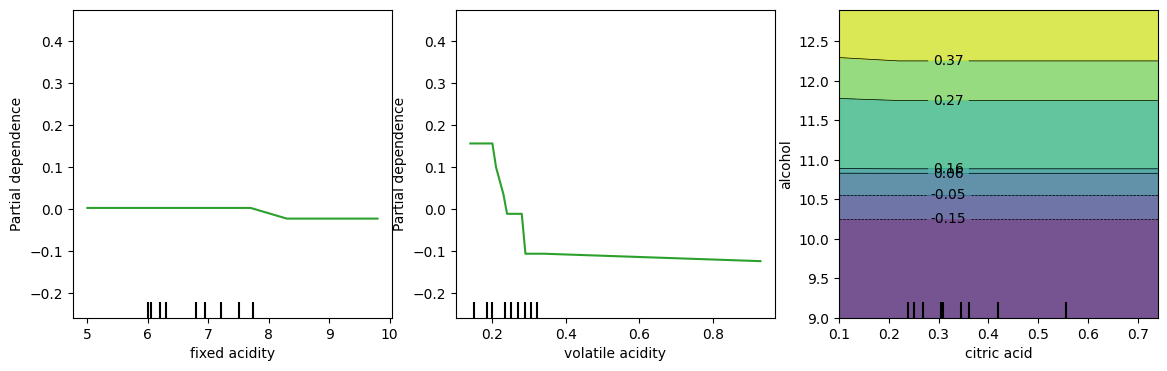

In [ ]:
features2 = ['fixed acidity', 'volatile acidity', ('citric acid', 'alcohol')]
fig, ax = plt.subplots(ncols=3, figsize=(14,4))
display = PartialDependenceDisplay.from_estimator(gb_regressor, r_X_test.iloc[:25,:],
                                                  features2, kind = 'average', random_state=0,
                                                  pd_line_kw = {'color':'tab:green', 'linestyle':'-'}, ax = ax)

- features2 = ['fixed acidity', 'volatile acidity', ('citric acid', 'alcohol')]
  - Эта строка определяет список под названием features2.
  - Он содержит названия признаков, которые мы хотим проанализировать в наших PDP.
  - Обратите внимание, что «лимонная кислота» и «алкоголь» сгруппированы вместе в кортеж. Это означает, что мы создадим 2D PDP для визуализации эффекта взаимодействия этих двух признаков вместе.

- fig, ax = plt.subplots(ncols=3, figsize=(14,4))
  - Эта строка использует matplotlib.pyplot.subplots для создания рисунка (fig) и массива осей (ax).
  - ncols=3: Мы создаем 3 подграфика, расположенных горизонтально, потому что у нас есть 3 элемента в нашем списке features2.
  - figsize=(14,4): Это устанавливает размер всего рисунка на 14 дюймов в ширину и 4 дюйма в высоту.

- display = PartialDependenceDisplay.from_estimator(...)
  - Это ядро кода. Он использует метод PartialDependenceDisplay.from_estimator из sklearn.inspection для расчета и отображения PDP. Давайте рассмотрим аргументы:
    - gb_regressor: Обученная модель регрессора градиентного бустинга, которую мы хотим проанализировать.
    - r_X_test.iloc[:25,:]: Выбирает первые 25 строк из тестового набора данных (r_X_test). Это подмножество данных используется для расчета частичной зависимости.
    - features2: Список признаков, который мы определили ранее, указывающий, какие признаки визуализировать.
    - kind = 'average': Это важно! Он указывает, что мы хотим построить только среднюю частичную зависимость (PDP). В этом случае мы не строим кривые индивидуального условного ожидания (ICE).
    - random_state=0: Обеспечивает воспроизводимость результатов.
    - pd_line_kw = {'color':'tab:green', 'linestyle':'-'}: Этот словарь настраивает внешний вид линии PDP, устанавливая цвет на зеленый и стиль линии на сплошной.
    - ax = ax: Сообщает PartialDependenceDisplay, что результаты следует отображать на осях (ax), которые мы создали ранее.

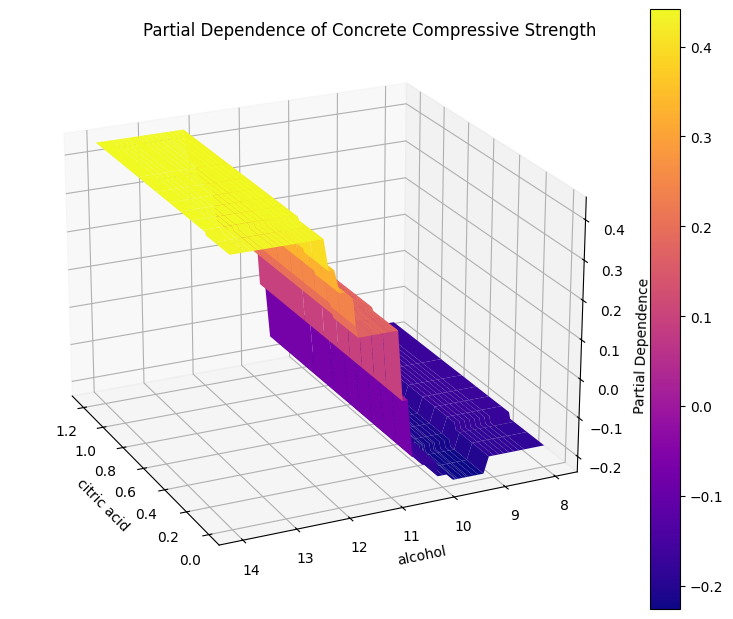

In [ ]:
from sklearn.inspection import partial_dependence
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))

features3 = ['citric acid','alcohol']
pdp = partial_dependence(gb_regressor, r_X_test, features = features3, kind = 'average')
XX, YY = np.meshgrid(pdp['grid_values'][0],pdp['grid_values'][1])
Z = pdp.average[0].T
ax = Axes3D(fig)
fig.add_axes(ax)
surface = ax.plot_surface(XX, YY, Z, rstride=1, cmap = plt.cm.plasma)
ax.set_xlabel(features3[0])
ax.set_ylabel(features3[1])
ax.set_zlabel('Partial Dependence')
ax.view_init(elev = 22, azim = 155)
plt.colorbar(surface)
plt.suptitle('Partial Dependence of Concrete Compressive Strength')
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
scoring = ['r2', 'neg_mean_absolute_percentage_error','neg_mean_squared_error']
gb_r_multi_pi = permutation_importance(gb_regressor, r_X, r_y, n_repeats=30, random_state=1, scoring = scoring)

for metric in gb_r_multi_pi:
  print(f'Metric: {metric}')
  r_pi = gb_r_multi_pi[metric]
  for i in r_pi.importances_mean.argsort()[::-1]:
    if r_pi.importances_mean[i]-2*r_pi.importances_std[i]>0:
      print(f'{r_X.columns[i]:<8}',f'{r_pi.importances_mean[i]:.3f}',f' +/- {r_pi.importances_std[i]:3f}')
  print('')

Metric: r2
alcohol  0.299  +/- 0.009857
volatile acidity 0.083  +/- 0.003700
free sulfur dioxide 0.047  +/- 0.002325
residual sugar 0.004  +/- 0.000564
fixed acidity 0.003  +/- 0.000440
citric acid 0.002  +/- 0.000189
pH       0.002  +/- 0.000244
density  0.001  +/- 0.000395
chlorides 0.001  +/- 0.000083

Metric: neg_mean_absolute_percentage_error
alcohol  0.019  +/- 0.000645
volatile acidity 0.007  +/- 0.000350
free sulfur dioxide 0.003  +/- 0.000150
citric acid 0.000  +/- 0.000018
fixed acidity 0.000  +/- 0.000033
residual sugar 0.000  +/- 0.000033
chlorides 0.000  +/- 0.000010
pH       0.000  +/- 0.000017

Metric: neg_mean_squared_error
alcohol  0.234  +/- 0.007730
volatile acidity 0.065  +/- 0.002901
free sulfur dioxide 0.037  +/- 0.001823
residual sugar 0.003  +/- 0.000442
fixed acidity 0.002  +/- 0.000345
citric acid 0.001  +/- 0.000148
pH       0.001  +/- 0.000192
density  0.001  +/- 0.000309
chlorides 0.001  +/- 0.000065



- Эта строка создает список под названием scoring, содержащий метрики, используемые для оценки производительности модели.
  - r2: R-квадрат (коэффициент детерминации), мера того, насколько хорошо модель соответствует данным.
  - neg_mean_absolute_percentage_error: Отрицательная средняя абсолютная процентная ошибка, измеряет среднюю процентную разницу между прогнозируемыми и фактическими значениями.
  - neg_mean_squared_error: Отрицательная среднеквадратичная ошибка, измеряет среднюю квадратичную разницу между прогнозируемыми и фактическими значениями.

- Эта строка вызывает функцию permutation_importance для расчета важности признаков для модели gb_regressor.
  - gb_regressor: Обученная регрессионная модель.
  - r_X: Данные признаков, используемые для обучения модели.
  - r_y: Данные целевой переменной, используемые для обучения модели.
  - n_repeats: Количество раз, которое значения признаков будут перемешиваться для расчета важности (30 в этом случае).
  - random_state: Начальное значение для генератора случайных чисел, чтобы обеспечить согласованные результаты при разных запусках.
  - scoring: Список метрик оценки, определенный ранее.

- Результат сохраняется в переменной gb_r_multi_pi.
- Этот цикл проходит по каждой метрике оценки в gb_r_multi_pi.
- Для каждой метрики:
  - Он выводит имя метрики.
  - Он получает результаты важности перестановок для этой метрики и сохраняет их в r_pi.
  - Затем он проходит по признакам в порядке их важности (используя argsort()[::-1] для получения индексов отсортированных значений важности в порядке убывания).
  - Если важность признака статистически значима (среднее значение важности - 2 * стандартное отклонение важности > 0), он выводит имя признака, его среднее значение важности и его стандартное отклонение важности.

In [ ]:
perm_importances = permutation_importance(gb_regressor, r_X, r_y, n_repeats=30, random_state=1)

for i in perm_importances.importances_mean.argsort()[::-1]:
  if perm_importances.importances_mean[i]-2*perm_importances.importances_std[i]>0:
    print(f'{r_X.columns[i]:<8}',f'{perm_importances.importances_mean[i]:.3f}',f' +/- {perm_importances.importances_std[i]:3f}')

alcohol  0.299  +/- 0.009857
volatile acidity 0.083  +/- 0.003700
free sulfur dioxide 0.047  +/- 0.002325
residual sugar 0.004  +/- 0.000564
fixed acidity 0.003  +/- 0.000440
citric acid 0.002  +/- 0.000189
pH       0.002  +/- 0.000244
density  0.001  +/- 0.000395
chlorides 0.001  +/- 0.000083


In [ ]:
r_gb_explainer = shap.TreeExplainer(gb_regressor)
r_gb_shap_values = r_gb_explainer.shap_values(r_X_test)

- r_gb_explainer = ...: Эта часть присваивает результат правой стороны уравнения переменной с именем r_gb_explainer. Думайте о r_gb_explainer как об инструменте, который поможет нам понять предсказания нашей модели.
- shap.TreeExplainer(...): Это ядро строки. Она вызывает функцию TreeExplainer из библиотеки shap. shap (SHapley Additive exPlanations) - это мощная библиотека для объяснения моделей машинного обучения.
- gb_regressor: Это модель машинного обучения, которую мы хотим объяснить. В данном случае это, вероятно, модель градиентного бустинга регрессора, которую вы уже обучили (gb_regressor был определен ранее в коде).

- r_gb_shap_values = ...: Эта часть присваивает результаты вычислений переменной с именем r_gb_shap_values. Эти результаты будут представлять значения SHAP.
- r_gb_explainer.shap_values(...): Это вызывает функцию shap_values интерпретатора, который мы создали в предыдущей строке. Это действие фактического расчета значений SHAP.
- r_X_test: Это данные, для которых вы хотите получить объяснения. Обычно это тестовый набор данных (или его часть), потому что вам интересно понять, как модель ведет себя на невидимых данных.

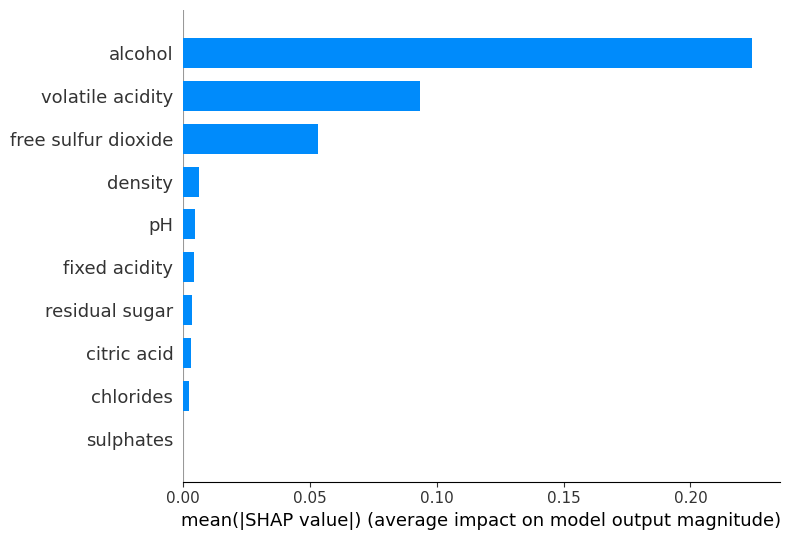

In [ ]:
shap.summary_plot(r_gb_shap_values, r_X_test, plot_type = 'bar', max_display = 10)

In [ ]:
gbModel_1_shap_values = r_gb_explainer.shap_values(r_X.iloc[15,:])
gbModel_15_shap_values = r_gb_explainer.shap_values(r_X.iloc[15:30,:])
gbModel_all_shap_values = r_gb_explainer.shap_values(r_X)

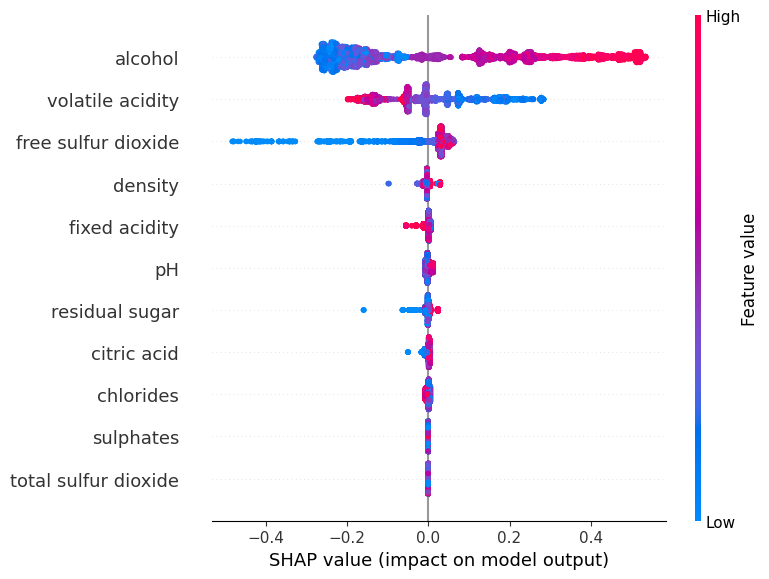

In [ ]:
shap.summary_plot(gbModel_all_shap_values, r_X)


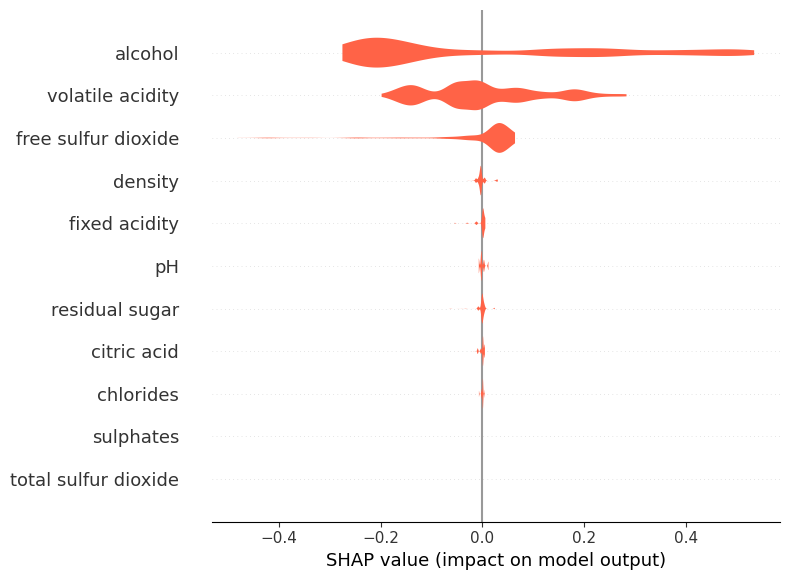

In [ ]:
shap.summary_plot(r_gb_explainer.shap_values(r_X), feature_names = r_X.columns.tolist(), plot_type = 'violin', color = 'Tomato')

In [ ]:
r_gb_f = lambda x: gb_regressor.predict(x)
r_gb_median = r_X_train.median().values.reshape((1,r_X_train.shape[1]))

r_gb_explainer = shap.Explainer(r_gb_f, r_gb_median)
r_gb_shap_values = r_gb_explainer(r_X_test)#.iloc[0:10,:])

PermutationExplainer explainer: 1471it [00:26, 34.36it/s]                          


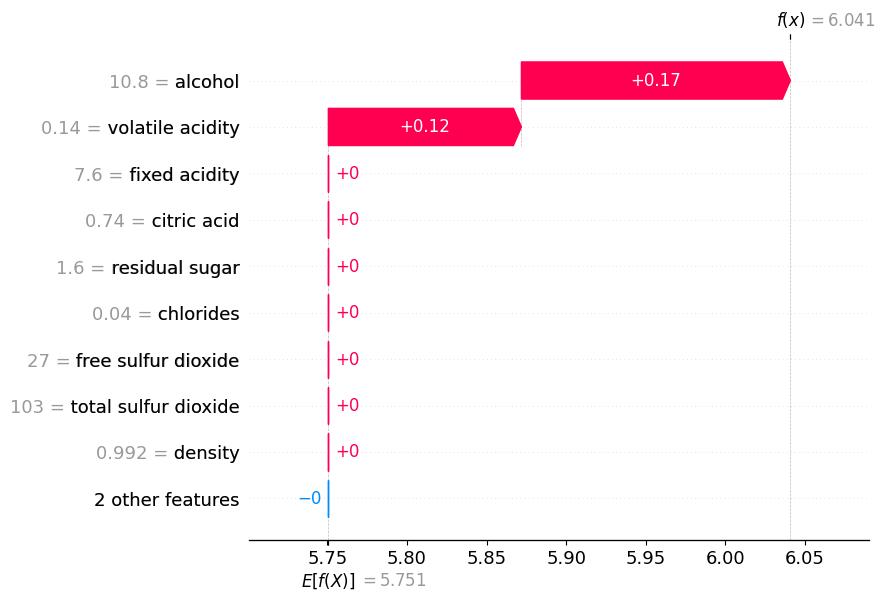

In [ ]:
shap.plots.waterfall(r_gb_shap_values[2])


In [ ]:
shap.plots.initjs()
shap.plots.force(r_gb_shap_values[5],
                 feature_names = r_X.columns.tolist())


In [ ]:
shap.plots.initjs()
shap.plots.force(r_gb_shap_values)


### Random Forest - Regressor

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=10,random_state=1)
rf_regressor.fit(r_X_train, r_y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
rf_r_y_pred = rf_regressor.predict(r_X_test)
print(f'R2 = {r2_score(r_y_test, rf_r_y_pred):.2f}')
print(f'MSE = {mean_squared_error(r_y_test, rf_r_y_pred):.2f}')

R2 = 0.43
MSE = 0.46


In [ ]:
r_X_test.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

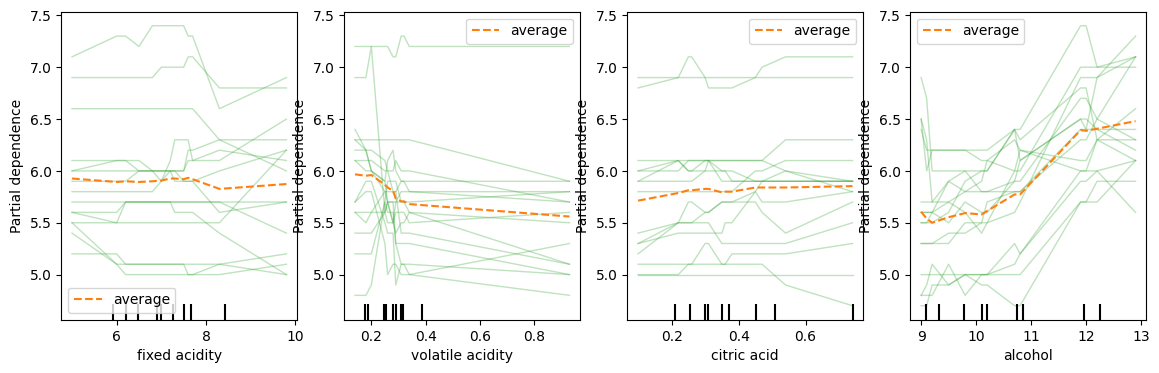

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol']
fig, ax = plt.subplots(ncols=4, figsize=(14,4))
display = PartialDependenceDisplay.from_estimator(rf_regressor, r_X_test.iloc[:15,:],
                                                  features, kind = 'both', random_state=0,
                                                  ice_lines_kw = {'color':'tab:green', 'linewidth':1},
                                                  pd_line_kw = {'color':'tab:orange', 'linestyle':'--'}, ax = ax)

- Выбор признаков для анализа:
  - Эта строка определяет список под названием features, содержащий имена признаков, которые мы хотим исследовать. В данном случае, фокус делается на «фиксированной кислотности», «летучей кислотности», «лимонной кислоте» и «алкоголе». Эти признаки, вероятно, являются столбцами в наборе данных (r_X_test).

- Подготовка графика
  - Эта строка использует matplotlib.pyplot.subplots для создания фигуры (fig) и массива осей (ax) для графика.
    - ncols=4: Мы создаем 4 подграфика, расположенных горизонтально (в столбцах), потому что мы анализируем 4 признака.
    - figsize=(14,4): Это устанавливает размер всей фигуры на 14 дюймов в ширину и 4 дюйма в высоту, обеспечивая достаточно места для подграфиков.

- Расчет и отображение графиков PDP и ICE:
  - Это ядро кода. Он использует метод PartialDependenceDisplay.from_estimator из sklearn.inspection для расчета и отображения графиков PDP и ICE. Давайте разберем аргументы:
    - rf_regressor: Обученная модель случайного леса регрессора, которую мы хотим проанализировать.
    - r_X_test.iloc[:15,:]: Выбирает первые 15 строк из тестового набора данных (r_X_test). Он будет использовать это подмножество данных для расчета частичной зависимости.
    - features: Список признаков, который мы определили ранее, указывающий, какие признаки визуализировать.
    - kind = 'both': Это важно! Он указывает, что мы хотим построить как среднюю частичную зависимость (PDP), так и кривые индивидуального условного ожидания (ICE). PDP показывает средний эффект признака на прогноз, в то время как ICE показывает эффект для отдельных точек данных.
    - random_state=0: Обеспечивает воспроизводимость результатов.
    - ice_lines_kw = {'color':'tab:green', 'linewidth':1}: Этот словарь управляет внешним видом линий ICE, устанавливая цвет на зеленый и толщину линии на 1.
    - pd_line_kw = {'color':'tab:orange', 'linestyle':'--'}: Этот словарь управляет внешним видом линии PDP, устанавливая цвет на оранжевый и стиль линии на пунктирный.
    - ax = ax: Сообщает PartialDependenceDisplay, что результаты следует отображать на осях (ax), которые мы создали ранее.

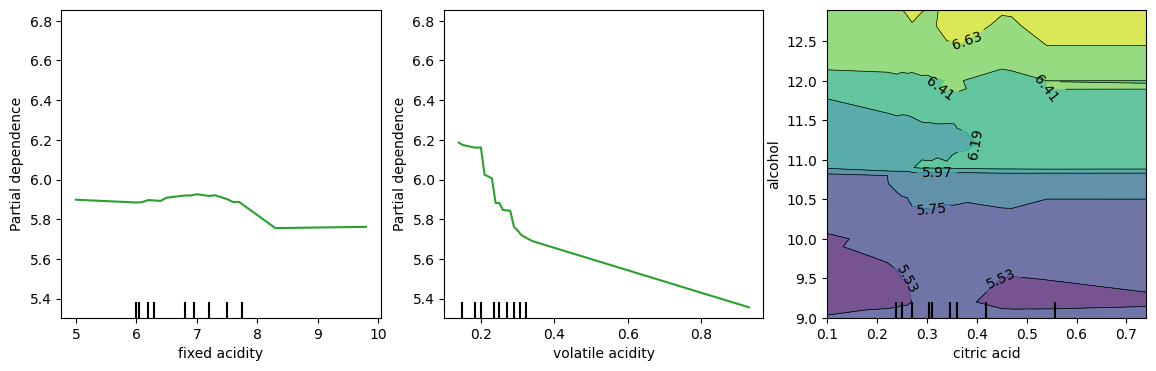

In [ ]:
features2 = ['fixed acidity', 'volatile acidity', ('citric acid', 'alcohol')]
fig, ax = plt.subplots(ncols=3, figsize=(14,4))
display = PartialDependenceDisplay.from_estimator(rf_regressor, r_X_test.iloc[:25,:],
                                                  features2, kind = 'average', random_state=0,
                                                  pd_line_kw = {'color':'tab:green', 'linestyle':'-'}, ax = ax)

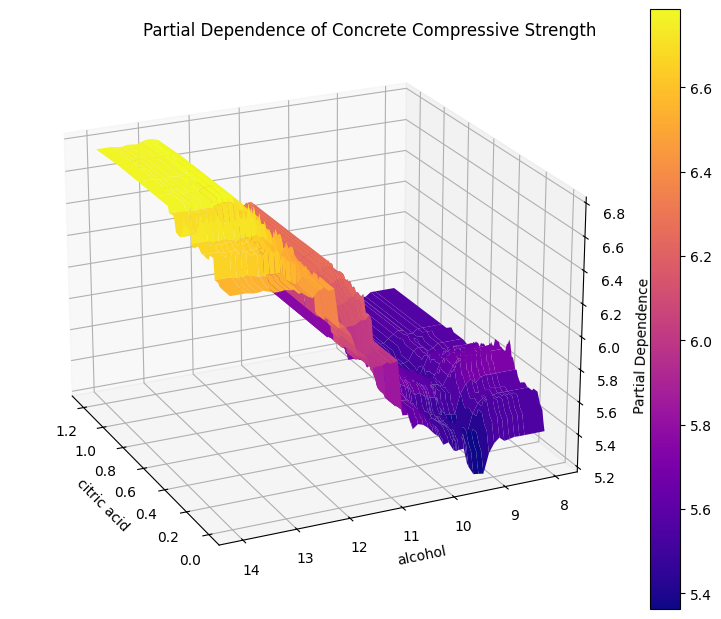

In [ ]:
from sklearn.inspection import partial_dependence
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))

features3 = ['citric acid','alcohol']
pdp = partial_dependence(rf_regressor, r_X_test, features = features3, kind = 'average')
XX, YY = np.meshgrid(pdp['grid_values'][0],pdp['grid_values'][1])
Z = pdp.average[0].T
ax = Axes3D(fig)
fig.add_axes(ax)
surface = ax.plot_surface(XX, YY, Z, rstride=1, cmap = plt.cm.plasma)
ax.set_xlabel(features3[0])
ax.set_ylabel(features3[1])
ax.set_zlabel('Partial Dependence')
ax.view_init(elev = 22, azim = 155)
plt.colorbar(surface)
plt.suptitle('Partial Dependence of Concrete Compressive Strength')
plt.show()

fig = plt.figure(figsize=(8,6))
- Эта строка создает объект фигуры (fig) для графика с указанным размером (8 дюймов на 6 дюймов).

features3 = ['citric acid', 'alcohol']
- Эта строка создает список features3, содержащий названия двух признаков, которые мы хотим проанализировать: "лимонная кислота" и "алкоголь".

pdp = partial_dependence(rf_regressor, r_X_test, features = features3, kind = 'average')
- Эта строка является ядром вычисления. Она использует функцию partial_dependence для расчета частичной зависимости целевой переменной от указанных признаков (features3).
- rf_regressor: Это, вероятно, обученная модель регрессора случайного леса.
- r_X_test: Это тестовые данные, используемые для расчета частичной зависимости.
- kind = 'average': Это указывает, что мы хотим рассчитать среднюю частичную зависимость.

XX, YY = np.meshgrid(pdp['grid_values'][0],pdp['grid_values'][1])
Z = pdp.average[0].T
- Эти строки подготавливают данные для 3D-графика.
- np.meshgrid: Создает сетку значений X и Y из значений сетки, полученных из расчета partial_dependence.
- Z: Представляет значения частичной зависимости, транспонированные для построения графика.

- Создание и настройка 3D-графика:
  - Эти строки создают 3D-график с помощью Axes3D и настраивают его внешний вид:
    - ax.plot_surface: Создает 3D-поверхностный график.
    - ax.set_xlabel, ax.set_ylabel, ax.set_zlabel: Устанавливают метки осей.
    - ax.view_init: Устанавливает угол обзора графика.
    - plt.colorbar: Добавляет цветовую шкалу к графику.


In [ ]:
from sklearn.inspection import permutation_importance
scoring = ['r2', 'neg_mean_absolute_percentage_error','neg_mean_squared_error']
r_multi_pi = permutation_importance(rf_regressor, r_X, r_y, n_repeats=30, random_state=1, scoring = scoring)

for metric in r_multi_pi:
  print(f'Metric: {metric}')
  r_pi = r_multi_pi[metric]
  for i in r_pi.importances_mean.argsort()[::-1]:
    if r_pi.importances_mean[i]-2*r_pi.importances_std[i]>0:
      print(f'{r_X.columns[i]:<8}',f'{r_pi.importances_mean[i]:.3f}',f' +/- {r_pi.importances_std[i]:3f}')
  print('')

Metric: r2
alcohol  0.759  +/- 0.015480
volatile acidity 0.331  +/- 0.007469
free sulfur dioxide 0.235  +/- 0.006828
residual sugar 0.117  +/- 0.003657
total sulfur dioxide 0.116  +/- 0.004839
pH       0.112  +/- 0.004363
chlorides 0.103  +/- 0.004085
fixed acidity 0.083  +/- 0.003116
sulphates 0.083  +/- 0.002700
citric acid 0.078  +/- 0.002897
density  0.077  +/- 0.002174

Metric: neg_mean_absolute_percentage_error
alcohol  0.067  +/- 0.000977
volatile acidity 0.038  +/- 0.000550
free sulfur dioxide 0.027  +/- 0.000471
total sulfur dioxide 0.018  +/- 0.000486
residual sugar 0.018  +/- 0.000353
chlorides 0.017  +/- 0.000392
pH       0.016  +/- 0.000413
density  0.014  +/- 0.000307
citric acid 0.014  +/- 0.000326
sulphates 0.014  +/- 0.000277
fixed acidity 0.013  +/- 0.000280

Metric: neg_mean_squared_error
alcohol  0.595  +/- 0.012139
volatile acidity 0.260  +/- 0.005857
free sulfur dioxide 0.184  +/- 0.005354
residual sugar 0.092  +/- 0.002868
total sulfur dioxide 0.091  +/- 0.003795

In [ ]:
perm_importances = permutation_importance(rf_regressor, r_X, r_y, n_repeats=30, random_state=1)

for i in perm_importances.importances_mean.argsort()[::-1]:
  if perm_importances.importances_mean[i]-2*perm_importances.importances_std[i]>0:
    print(f'{r_X.columns[i]:<8}',f'{perm_importances.importances_mean[i]:.3f}',f' +/- {perm_importances.importances_std[i]:3f}')

alcohol  0.759  +/- 0.015480
volatile acidity 0.331  +/- 0.007469
free sulfur dioxide 0.235  +/- 0.006828
residual sugar 0.117  +/- 0.003657
total sulfur dioxide 0.116  +/- 0.004839
pH       0.112  +/- 0.004363
chlorides 0.103  +/- 0.004085
fixed acidity 0.083  +/- 0.003116
sulphates 0.083  +/- 0.002700
citric acid 0.078  +/- 0.002897
density  0.077  +/- 0.002174


In [ ]:
r_rf_explainer = shap.TreeExplainer(rf_regressor)
r_rf_shap_values = r_rf_explainer.shap_values(r_X_test)

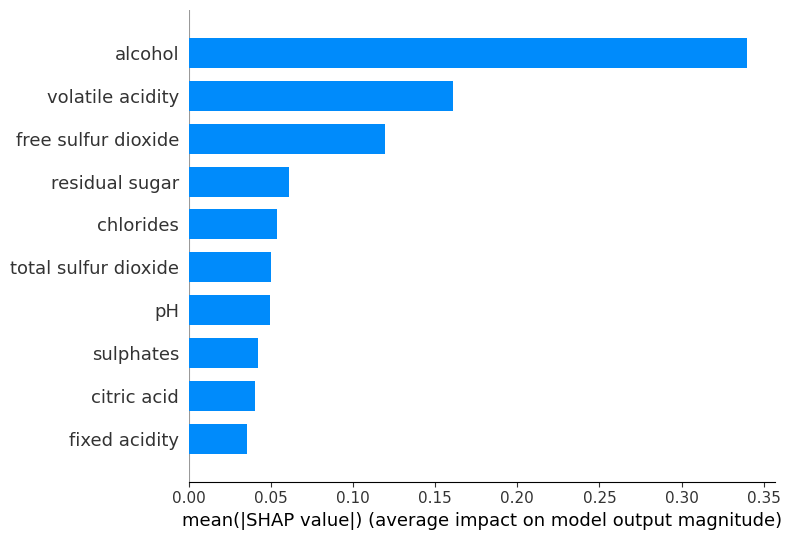

In [ ]:
shap.summary_plot(r_rf_shap_values, r_X_test, plot_type = 'bar', max_display = 10)

In [ ]:
rfModel_1_shap_values = r_rf_explainer.shap_values(r_X.iloc[15,:])
rfModel_15_shap_values = r_rf_explainer.shap_values(r_X.iloc[15:30,:])
rfModel_all_shap_values = r_rf_explainer.shap_values(r_X)


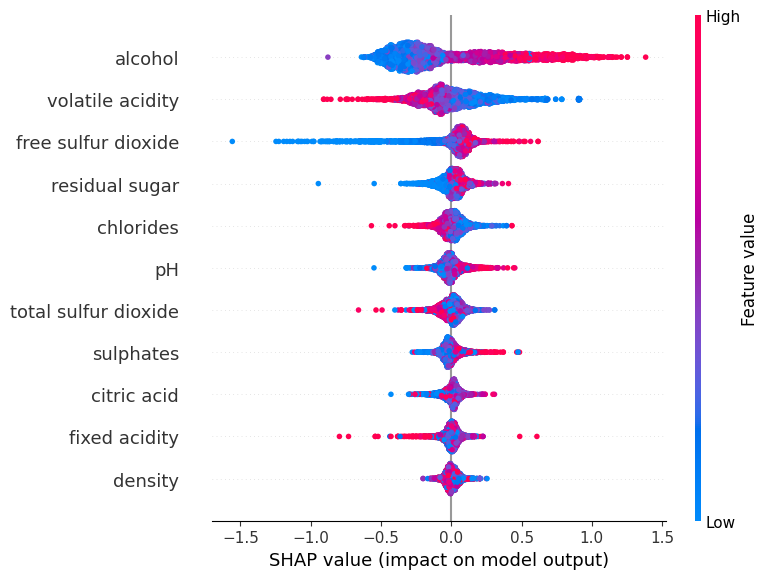

In [ ]:
shap.summary_plot(rfModel_all_shap_values, r_X)


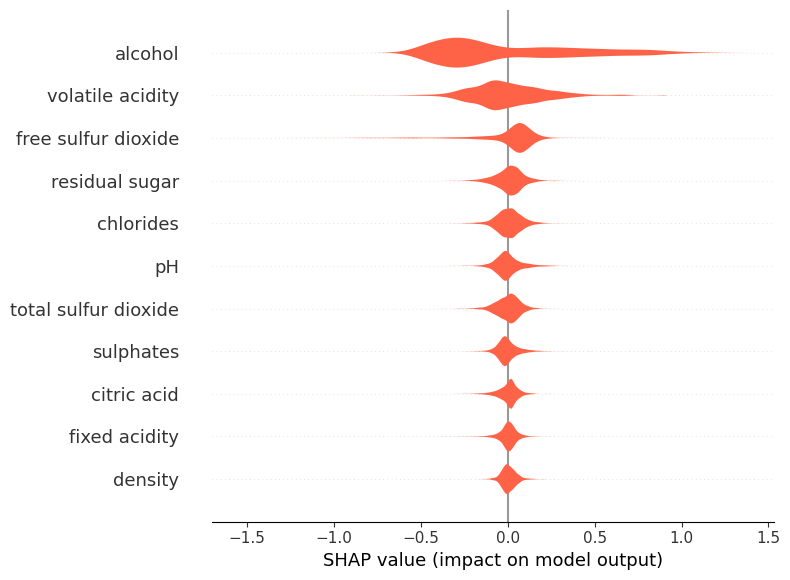

In [ ]:
shap.summary_plot(r_rf_explainer.shap_values(r_X), feature_names = r_X.columns.tolist(), plot_type = 'violin', color = 'Tomato')


In [ ]:
r_rf_f = lambda x: rf_regressor.predict(x)
r_rf_median = r_X_train.median().values.reshape((1,r_X_train.shape[1]))

r_rf_explainer = shap.Explainer(r_rf_f, r_rf_median)
r_rf_shap_values = r_rf_explainer(r_X_test)#.iloc[0:10,:])

PermutationExplainer explainer: 1471it [01:07, 18.59it/s]


- r_rf_f: Эта переменная получает функцию. Можете считать ее сокращением для выполнения предсказаний с помощью обученной модели Случайного Леса (rf_regressor).
- lambda x:: Это способ создать небольшую анонимную функцию в Python. Она принимает входные данные x (которые будут данными) и что-то с ними делает.
- rf_regressor.predict(x): Это ядро функции. Она принимает входные данные x и использует метод predict rf_regressor для создания предсказаний.
<br>
- r_rf_median: Эта переменная будет хранить медианные значения обучающих данных.
- r_X_train: Это, вероятно, относится к признакам обучающих данных (независимым переменным).
- median(): Этот метод вычисляет медианное значение для каждого столбца (признака) в обучающих данных.
- values: Это извлекает медианные значения в виде массива NumPy.
- reshape((1,r_X_train.shape[1])): Это преобразует медианные значения в одну строку с тем же количеством столбцов, что и обучающие данные. Это часто делается для обеспечения совместимости с библиотекой SHAP.
<br>

- r_rf_explainer: Эта переменная будет содержать объект-интерпретатор SHAP. Это инструмент, который поможет нам понять предсказания модели.
- shap.Explainer(): Это создает объект-интерпретатор с помощью библиотеки shap.
- r_rf_f: Это функция предсказания, которую мы определили ранее. Мы сообщаем интерпретатору, как делать предсказания с помощью модели.
- r_rf_median: Это фоновый набор данных или точка отсчета для вычислений SHAP. Часто он устанавливается равным медиане обучающих данных.
<br>

- r_rf_shap_values: Эта переменная будет хранить вычисленные значения SHAP. Эти значения показывают, как каждый признак влияет на предсказания модели для отдельных точек данных.
- r_rf_explainer(): Мы вызываем объект-интерпретатор для вычисления значений SHAP.
- r_X_test: Это тестовые данные. Мы получаем объяснения того, как модель делает предсказания на этих данных.

In [ ]:
r_rf_shap_values

.values =
array([[-0.0047619 , -0.2452381 , -0.0047619 , ..., -0.07380952,
         0.02857143, -0.00952381],
       [ 0.01190476, -0.19761905,  0.0452381 , ...,  0.02380952,
         0.00714286, -0.09761905],
       [ 0.0047619 ,  0.18095238,  0.08333333, ...,  0.05952381,
        -0.0047619 , -0.00714286],
       ...,
       [-0.02619048,  0.01190476, -0.07619048, ...,  0.02142857,
        -0.06904762,  0.20714286],
       [ 0.00434783, -0.15652174,  0.00869565, ...,  0.02608696,
        -0.09782609, -0.0173913 ],
       [ 0.00238095, -0.07142857,  0.06190476, ...,  0.07619048,
        -0.0452381 ,  1.16428571]])

.base_values =
array([6., 6., 6., ..., 6., 6., 6.])

.data =
array([[ 7.3 ,  0.32,  0.35, ...,  3.24,  0.42, 10.7 ],
       [ 7.  ,  0.31,  0.26, ...,  3.13,  0.46,  9.8 ],
       [ 7.6 ,  0.14,  0.74, ...,  3.07,  0.4 , 10.8 ],
       ...,
       [ 6.  ,  0.2 ,  0.26, ...,  3.14,  0.38, 11.5 ],
       [ 6.1 ,  0.23,  0.27, ...,  3.16,  0.4 , 10.2 ],
       [ 6.9 ,  0.58,  

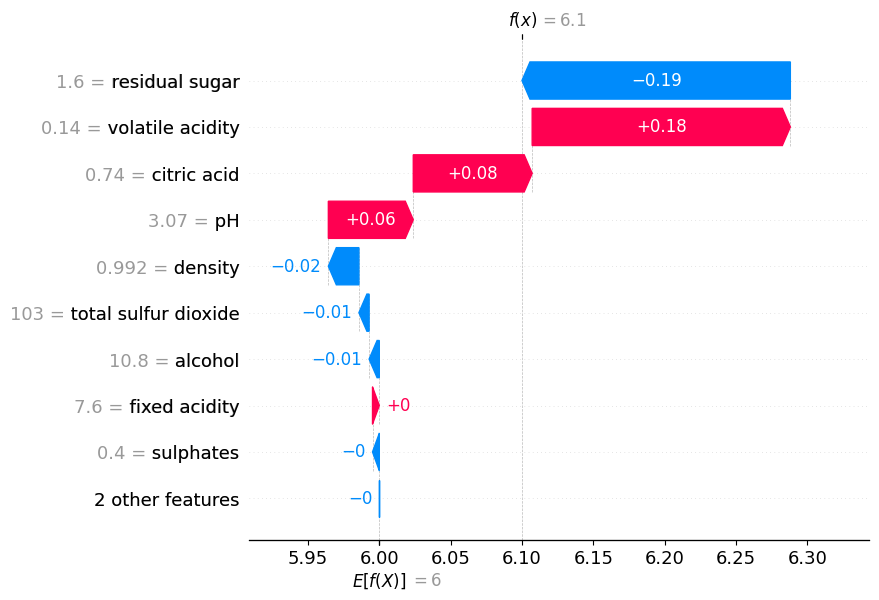

In [ ]:
shap.plots.waterfall(r_rf_shap_values[2])

In [ ]:
shap.plots.initjs()
shap.plots.force(r_rf_shap_values[5],
                 feature_names = r_X.columns.tolist())

- shap.plots.initjs():
  - Эта строка инициализирует библиотеку Javascript, необходимую для интерактивных графиков SHAP в Jupyter Notebook. Ее нужно вызвать перед созданием любых интерактивных графиков SHAP, таких как силовой график.

- shap.plots.force(...):
  - Эта строка создает сам силовой график. Давайте рассмотрим аргументы:
    - r_rf_shap_values[5]: Это, вероятно, представляет значения SHAP, рассчитанные для 6-го экземпляра (индекс 5) в тестовых данных (r_X_test). Значения SHAP количественно определяют влияние каждого признака на предсказание для этого конкретного экземпляра.
    - feature_names = r_X.columns.tolist(): Этот аргумент предоставляет имена признаков, используемых в модели. r_X.columns.tolist() получает имена столбцов (признаков) из набора данных (r_X) и преобразует их в список. Это важно для маркировки признаков на силовом графике.

In [ ]:
shap.plots.initjs()
shap.plots.force(r_rf_shap_values)